In [7]:
import models as mym;reload(mym)
import pymisca.vis_util as pyvis
import numpy as np
import pymisca.util as pyutil; reload(pyutil)
import pymisca.vis_util as pyvis; reload(pyvis)
if pyutil.is_ipython():
    %matplotlib inline
    
    
import tutil; reload(tutil)
from tutil import *
import edward as ed
import edward.models as edm

<class 'models.ModelA'> {'name': 'test'}
<models.ModelA object at 0x7f09aff87bd0> {'name': 'test'}
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
<class 'models.ModelA'> {'name': 'test'}
<models.ModelA object at 0x7f09d3ff9450> {'name': 'test'}
is in ipython: 1
[WARN] pymisca.vis_util cannot find network


[0, 0] [[ 0.30329359 -0.08297725]
 [-0.08297725  0.07976522]] 500


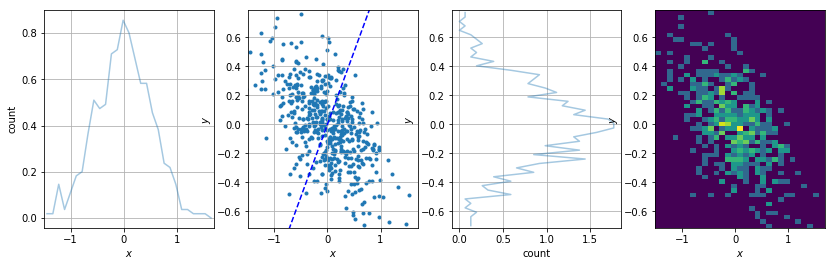

In [4]:
X = tutil.toyData(K=1,mus=[[0,0]])
pyvis.qc_2var(X.T[0],X.T[1],)

<class 'models.GMMLRP_VIMAP'> {'name': 'testB1'}
None
hiModel
1000/1000 [100%] ██████████████████████████████ Elapsed: 2s | Loss: inf
[1.0]
[-0.0023803  -0.00662772] [[ 0.27573445 -0.07744153]
 [-0.07744153  0.07023508]] 500


tutil.py:36: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  lst += [X]


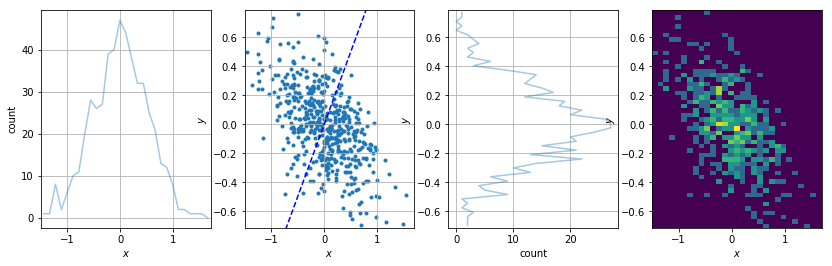

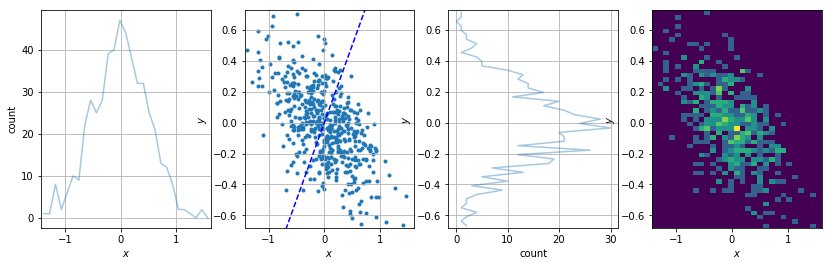

In [10]:
m = mym.GMMLRP_VIMAP(D=2,K=1,name='testB1')
m.fit(X)
plotModel(m,X)


In [56]:
# m.inference.finalize()
m.inference.latent_vars,m.inference.latent_vars_unconstrained

({<ed.RandomVariable 'testC3_2/Dirichlet/' shape=(1,) dtype=float32>: <ed.RandomVariable 'testC3_3/PointMass/' shape=(1,) dtype=float32>,
  <ed.RandomVariable 'testC3_2/Uniform_2/' shape=(1,) dtype=float32>: <ed.RandomVariable 'testC3_3/PointMass_4/' shape=(1,) dtype=float32>,
  <ed.RandomVariable 'testC3_2/Uniform_3/' shape=(1,) dtype=float32>: <ed.RandomVariable 'testC3_3/PointMass_5/' shape=(1,) dtype=float32>},
 {<ed.RandomVariable 'testC3_2/Dirichlet/' shape=(1,) dtype=float32>: <ed.RandomVariable 'testC3_3/PointMass/' shape=(1,) dtype=float32>,
  <ed.RandomVariable 'testC3_2/Uniform_2/' shape=(1,) dtype=float32>: <ed.RandomVariable 'testC3_3/PointMass_4/' shape=(1,) dtype=float32>,
  <ed.RandomVariable 'testC3_2/Uniform_3/' shape=(1,) dtype=float32>: <ed.RandomVariable 'testC3_3/PointMass_5/' shape=(1,) dtype=float32>})

Automatic pdb calling has been turned OFF
<class 'gamma_radial_affine_lrp.GammaRadialAffineLRP_VIMAP'> {'name': 'testC3'}
('reuse', True)
('reuse', True)
hiModel
1000/1000 [100%] ██████████████████████████████ Elapsed: 6s | Loss: 12102.685
[1.0]
30098.836


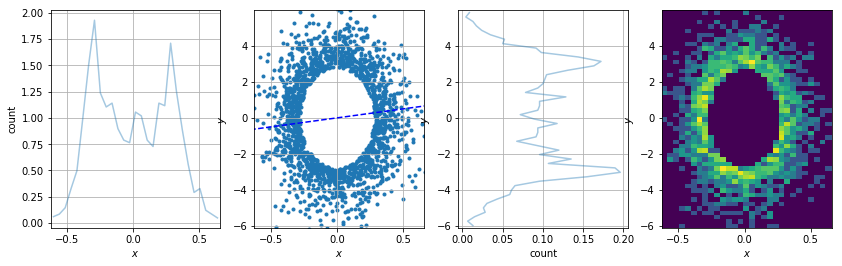

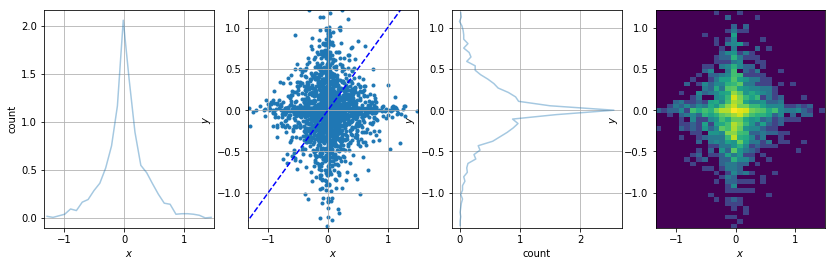

In [200]:
import gamma_radial_affine_lrp; reload(gamma_radial_affine_lrp)
_class = gamma_radial_affine_lrp.GammaRadialAffineLRP_VIMAP
%pdb 0
m = _class(D=2,K=1,name='testC3')
m.fit(X)
tutil.plotModel(m,X)
print (-m.predict_proba(X,log=1,norm=0).sum())

In [599]:
def e_step(K,X,invert=1,mean=1):
    Y = X[:,:,None] * X[:,None,:]
    Lsq = np.sum(Y * K[None],axis=(1,2),keepdims=1)
#     print Y.shape,Lsq.shape
    val  =  Y/Lsq
    val = np.trace(val.T,)
    print val.shape
    if not mean:
        return np.ravel(val)
        
#     print np.min(Lsq)
    KK = np.mean( val,axis=0)  *2
        
    if invert:
        KK = np.linalg.inv(KK)
    return KK
#     return np.linalg
#     print Y.shape
# e_step(X,X)
# K models.pyls#
X = np.random.random(size=(300,2))
K = pyutil.random_covmat()
K = e_step(K,X)
pyutil.printlines(K)

(300,)


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

[0, 0] [[13.57967473 15.60947749]
 [15.60947749 30.52138768]] 4000
Initial coordinate: [0.13744256 0.06033997 0.06033997 0.24256783]
Initial  objective: 0.2591987027023108
Ending  coordinate: [ 0.22578367 -0.11644341 -0.11644341  0.09911721]
Ending  objective: -0.3087575051437674
[WARN] cannot plot coutour cannot reshape array of size 2 into shape (2,2)


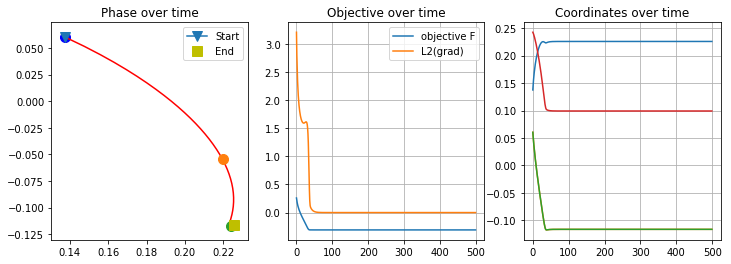

[[ 2.33529428 -1.19433376]
 [-1.19433376  1.0390267 ]]

[[ 2.40413421 -1.23988406]
 [-1.23988406  1.05539552]]


In [800]:
class fnormal(object):
    def __init__(self,K = None):
        self.K = K
        self.D = len(K)
    def log_prob(self,X,K=None):
        K = self.K if K is None else K
        K = np.reshape(K,(self.D,self.D))
        det = np.linalg.det(K)
        Y = X[:,:,None] * X[:,None,:]
        Lsq = np.sum(Y * K[None],axis=(1,2),keepdims=1)
    #     print Y.shape,Lsq.shape
        val  =  Y/Lsq
        val = np.trace(val.T)
        val = np.log(val) + np.log(det)/2
        return val
    def gradF(self,X,K=None):
        K = self.K if K is None else K
        K = np.reshape(K,(self.D,self.D))
#         det = np.linalg.det(K)
        Y = X[:,:,None] * X[:,None,:]
        Lsq = np.sum(Y * K[None],axis=(1,2),keepdims=1)
        grad = np.linalg.inv(K)/2. - np.mean(Y/Lsq,axis=0)
        return grad

i+=1
np.random.seed(i)
K = pyutil.random_covmat(D=2)
X = tutil.toyData(mus=[[0,0]],Cs = [np.linalg.inv(K)],K=1,N0=4000)
m = fnormal(K)
logP = m.log_prob(X)
Y = np.exp(logP)
gd = m.gradF(X)
import pymisca.optim as pyopt

h = lambda *K: -m.log_prob(X=X,K=K).mean()
gdf = lambda *K: -np.ravel(m.gradF(X=X,K=K))

# adv = pyopt.make_adv_descent(h = h, D=4,dt=0.01,gradF=gdf,)
# x = np.random.random(size=8)
x0 = pyutil.random_covmat().ravel()
# adv(x,1)
data = pyopt.main(adv_maker=pyopt.make_adv_descent,D=4,gradF=gdf,h=h,dt=0.005,x0=x0);
# np.ravel(gd)



print K/np.linalg.det(K)**0.5

Ko =  data['coord'][-1]
# Ko = K
Ko = np.reshape(Ko,(m.D,m.D))
Ko *= 1./np.linalg.det(Ko)**0.5
# Ko = np.linalg.inv(Ko)
print 
print Ko
# np.linalg.det(Ko)

In [760]:
print K/np.linalg.det(K)**0.5

Ko =  data['coord'][-1]
# Ko = K
Ko = np.reshape(Ko,(m.D,m.D))
Ko *= 1./np.linalg.det(Ko)**0.5
Ko = np.linalg.inv(Ko)
print 
print Ko
# np.linalg.det(Ko)

[[ 1.75842365 -0.69744151]
 [-0.69744151  0.84531657]]

[[ 1.86948148 -0.76097795]
 [-0.76097795  0.844666  ]]


In [746]:
Ko =  data['coord'][-1]
# Ko = K
Ko = np.reshape(Ko,(m.D,m.D))
Ko *= 1./np.linalg.det(Ko)**0.5
Ko = np.linalg.inv(Ko)
Ko
# np.linalg.det(Ko)

array([[ 0.29632617, -0.64798014],
       [-0.64798014,  4.79160603]])

In [589]:

i+=1
print i
np.random.seed(i)
D = 3
C = pyutil.random_covmat(D=D)
K = C
# K = np.linalg.inv(K)
# K = C
np.random.seed(i)
X = tutil.toyData(K=1,mus=[[0,]*D],Cs=[K],D=D)
D = X.shape[-1]
for _ in range(20):
    print 
    K = e_step(K,X)

    K = K/np.sqrt(abs(np.linalg.det(K)))
    pyutil.printlines(K)
#     L = np.linalg.norm(X,axis=1)
# print C.dot(K)
print C/K

55
[0, 0, 0] [[ 0.38828067  0.12290644 -0.35767285]
 [ 0.12290644  0.11325453 -0.02365972]
 [-0.35767285 -0.02365972  0.49548136]] 500

[ 1.73823406 -1.38758889  0.95747179]
[-1.38758889  2.04613274 -1.00317507]
[ 0.95747179 -1.00317507  1.15307572]

[ 2.23771001 -2.10517793  1.47709363]
[-2.10517793  2.74812704 -1.42267857]
[ 1.47709363 -1.42267857  1.23997351]

[ 3.29913092 -3.19873516  2.21444888]
[-3.19873516  4.05775299 -2.12555338]
[ 2.21444888 -2.12555338  1.73418836]

[ 3.31266145 -3.24176324  2.22754468]
[-3.24176324  4.06949257 -2.13945605]
[ 2.22754468 -2.13945605  1.70586561]

[ 3.57656485 -3.51198777  2.40429597]
[-3.51198777  4.38939447 -2.31054802]
[ 2.40429597 -2.31054802  1.82542693]

[ 3.55371307 -3.49423561  2.38789401]
[-3.49423561  4.35880294 -2.29550489]
[ 2.38789401 -2.29550489  1.80656021]

[ 3.61207316 -3.55353796  2.42640229]
[-3.55353796  4.42898604 -2.33287637]
[ 2.42640229 -2.33287637  1.8329554 ]

[ 3.60216358 -3.54456542  2.41935426]
[-3.54456542  4.41612

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


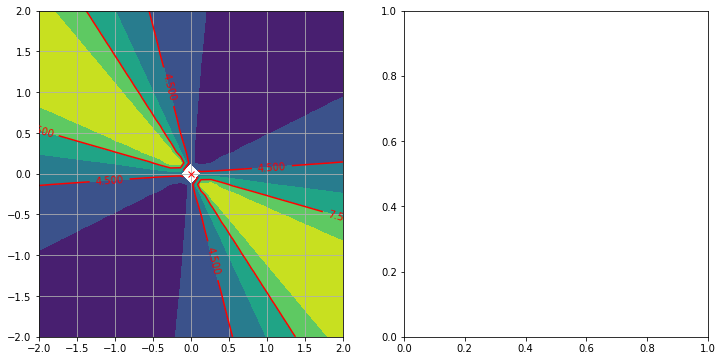

In [109]:
K = pyutil.random_covmat()
def f(x,y):
    X = np.vstack([x,y]).T
    val = X.dot(X.T)/X.dot(K).dot(X.T)
    
#     val = e_step(K,X,mean=0)
#     print X.shape
#     print val.shape
    return val
pyvis.dmet_2d(f);


In [143]:
def m_step(K,X):
    Y  = (X[:,:,None]*X[:,None,:])
    v1 = np.mean((Y)/np.sum(Y*K,axis=(1
                                      ,2),keepdims=1),axis=0)*2    
    return v1 

In [521]:
i+=1
np.random.seed(i)
C = pyutil.random_covmat()

X = tutil.toyData(mus=[[0,0]],Cs=[C],N0=20000,K=1)
np.random.seed(i)
cst = np.exp( np.random.random()*3 -1.5)
print cst
K = np.linalg.inv(C)
K = K*cst

Y  = (X[:,:,None]*X[:,None,:])
v0 = C
v1 = np.mean((Y)/np.sum(Y*K,axis=(1
                                  ,2),keepdims=1),axis=0)*2
print v1/v0
# print v1-v0
# print v1
# print v0
print v1.dot(K)
# print C0
# print C/np.sqrt(abs(np.linalg.det(C)))

[0, 0] [[ 0.14232612 -0.00590866]
 [-0.00590866  0.05185692]] 20000
2.7187670154789316
[[0.36981551 0.35138753]
 [0.35138753 0.36565667]]
[[1.00568033 0.00573577]
 [0.0016182  0.99431967]]


In [332]:
N = 9500
x = np.random.normal(size=N)
y = np.random.normal(size=N)*0.2
# y = x
X = np.vstack([x,y],).T
C = X.T.dot(X)/N

K = C
# K = np.linalg.inv(C)

Y  = (X[:,:,None]*X[:,None,:])
v0 = C
v1 = np.mean((Y)/np.sum(Y*K,axis=(1
                                  ,2),keepdims=1),axis=0)*2
print v1/v0
print v1-v0
print v1
print v0
print v1.dot(K)
# # C = np.linalg.inv(C)
# # Cm = e_step(C,X,invert=0)
# Cm = m_step(C,X)
# Cm.dot(C),C,Cm
# X.shape

[[ 1.9043382  19.54056109]
 [19.54056109 48.09774257]]
[[ 0.90845324 -0.00812664]
 [-0.00812664  1.90009179]]
[[ 1.91300357 -0.00856495]
 [-0.00856495  1.94043537]]
[[ 1.00455033e+00 -4.38316649e-04]
 [-4.38316649e-04  4.03435851e-02]]
[[ 1.92171213e+00 -1.18404224e-03]
 [-9.45445175e-03  7.82878736e-02]]


[0, 0] [[ 2.50912113 -0.67926584]
 [-0.67926584  0.58243584]] 500


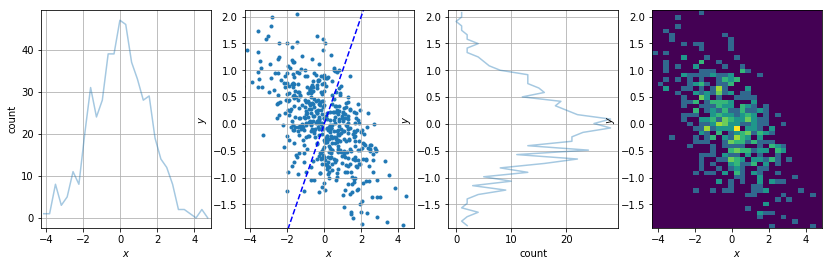

In [51]:
C = np.linalg.inv(K)
X = tutil.toyData(mus=[[0,0]],Cs=[C],K=1)
pyvis.qc_2var(X.T[0],X.T[1],)

In [15]:
import tensorflow as tf
# tf.contrib.distributions.Dirichlet??

In [ ]:

        name = self.name
        try:
            tf.get_variable(name+'/test',[1])
            reuse = None
        except:
            reuse = True
        print reuse
        with tf.variable_scope(name, reuse=reuse):
            
            ##### Prior
            mu = edm.Normal(tf.zeros(D), tf.ones(D), sample_shape=K)            
            scale_diag =  edm.Uniform(sample_shape=(K,D))
            scale_perturb_factor =  edm.Uniform(sample_shape=(K,D,1))            
#             scale_perturb_factor = edm.Normal(
#                     loc=tf.zeros(1),
#                     scale=tf.ones(1),
#                     sample_shape=(K,D)
#                 )
            
#             self.pi = edm.Dirichlet(tf.ones(K))
            self.pi = pi = edm.Dirichlet( float(alpha)/K * tf.ones(K) )
            
        
            ##### Posterior
            self.q_pi = ed.models.PointMass(
                tf.nn.softmax(
                    tf.get_variable("q_pi", [K])
                )
            )
            self.q_mu = ed.models.PointMass(
                tf.get_variable("q_mu", [K,D])
            )
            self.q_scale_diag  = edm.PointMass(
                tf.nn.softplus(
                    tf.get_variable('q_scale_diag',shape=[K,D])
                              ),
            )
            self.q_scale_perturb_factor = ed.models.PointMass(
                (
                    tf.get_variable("q_scale_perturb_factor", [K,D,1])
                )
            )
            
edm.MultivariateNormalDiagPlusLowRank()